In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from glob import glob

In [22]:
data = np.load('./data/data_norm.npz')

In [23]:
data.files

['arr_0', 'arr_1']

In [24]:
X= data['arr_0']
y = data['arr_1']

In [30]:
X.shape,y.shape

((5465, 10000), (5465,))

In [26]:
X1 = X - X.mean(axis=0)

# Eigen Image

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components=None,whiten=True,svd_solver='auto')

In [9]:
X_pca  = pca.fit_transform(X1)

In [10]:
eigen_ratio = pca.explained_variance_ratio_
eigen_ratio_cum = np.cumsum(eigen_ratio)

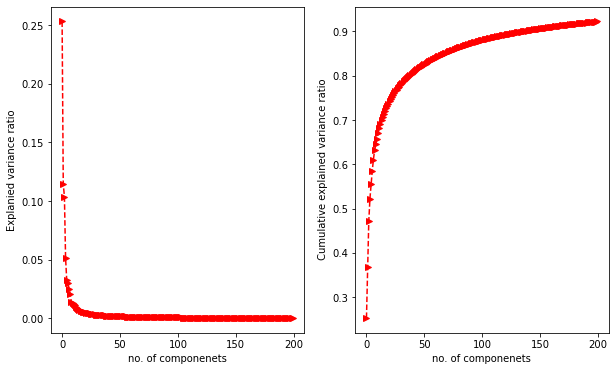

In [11]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.xlabel('no. of componenets')
plt.ylabel('Explanied variance ratio')
plt.plot(eigen_ratio[:200],'r>--')
plt.subplot(1,2,2)
plt.xlabel('no. of componenets')
plt.ylabel(' Cumulative explained variance ratio')
plt.plot(eigen_ratio_cum[:200],'r>--')

conclusion, using elbow method , considering number of componenets between 25-30
> since if I consider number of components between 25-30 the explained varrience is around 75%. so in order to get min 80% of the expalnied varrience I will consider 50 componenets

In [12]:
pca_50 = PCA(n_components=50,whiten=True,svd_solver='auto')
X_pca_50 =  pca_50.fit_transform(X1)

In [13]:
X_pca_50

array([[ 0.88204906,  0.29039649,  0.34503448, ...,  0.06914259,
         0.49324683,  0.76794652],
       [ 1.18961718, -0.22151957,  0.31999116, ..., -1.04929548,
        -0.22084778, -1.16526621],
       [ 0.28449739, -0.53844583, -0.75719832, ...,  0.68278581,
        -0.20565307,  0.46471298],
       ...,
       [ 0.87885545, -1.49152773, -0.42372212, ..., -2.52449856,
        -0.15079034,  0.66345813],
       [-0.31194883,  0.16098533,  0.9404969 , ..., -0.94704216,
         0.80600136,  2.1010351 ],
       [ 1.19175931, -1.03262861, -2.88380858, ..., -1.89044897,
         1.3526562 , -0.53541389]])

In [14]:
import pickle

In [15]:
pickle.dump(pca_50,open('./model/pca_50.pickle','wb'))

In [16]:
x_pca_inv = pca_50.inverse_transform(X_pca_50)

In [17]:
x_pca_inv.shape

(5465, 10000)

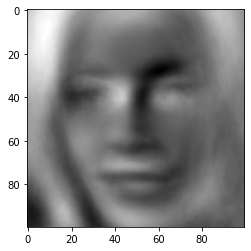

In [18]:
##consider one image
eig_img = x_pca_inv[0,:]
eig_img = eig_img.reshape(100,100)
plt.imshow(eig_img,cmap='gray')

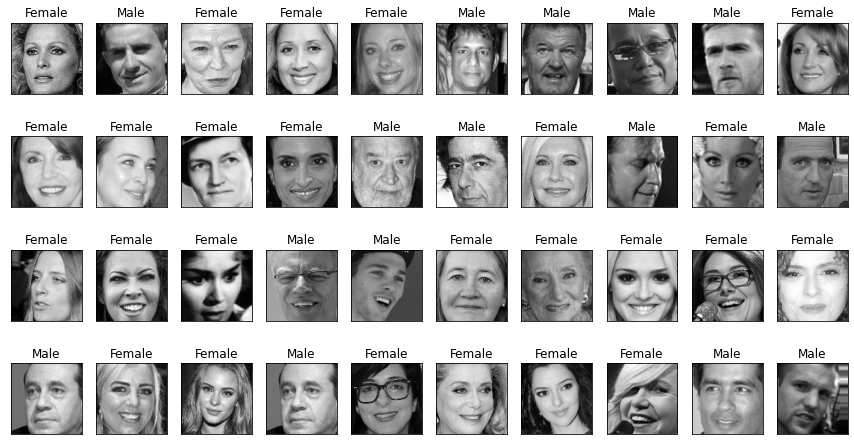

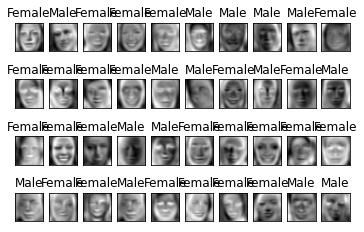

In [43]:
def label(y):
    if y==0:
        return 'Male'
    else:
        return 'Female'
    
np.random.randint(1001)    
pics = np.random.randint(0,5451,40)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = X[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title(label(y[pic]))
    plt.xticks([])
    plt.yticks([])
plt.show()
for i, pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = x_pca_inv[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title(label(y[pic]))
    plt.xticks([])
    plt.yticks([])
plt.show()    

In [28]:
X.mean(axis=0)

array([0.37105789, 0.36723535, 0.36366898, ..., 0.37456613, 0.37551477,
       0.37780241])

In [29]:
#saving the data
np.savez('./data/data_pca_50_y_mean.pickle',X_pca_50,y,X.mean(axis=0))